In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

# suppress warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import os

# 设置包含CSV文件的文件夹路径
folder_path = 'D:/DocumentsD/NYU Y1T2/Data dive'

# 初始化一个空的DataFrame来存储所有年份的数据
all_years_data = pd.DataFrame()

# 遍历从2016年到2023年的每一年
for year in range(2016, 2024):
    # 构建当前年份的CSV文件名
    file_name = f'annual_conc_by_monitor_{year}.csv'
    
    # 构建完整的文件路径
    file_path = os.path.join(folder_path, file_name)
    
    # 检查文件是否存在
    if os.path.exists(file_path):
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 添加一个新列来标识年份，如果需要的话
        df['Year'] = year
        
        # 将读取的数据追加到all_years_data DataFrame中
        all_years_data = pd.concat([all_years_data, df], ignore_index=True)
    else:
        print(f'File {file_name} does not exist.')

# 查看合并后的DataFrame
print(all_years_data)


        State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
0                1            3        10           44201    1  30.497478   
1                1            3        10           44201    1  30.497478   
2                1            3        10           44201    1  30.497478   
3                1            3        10           44201    1  30.497478   
4                1            3        10           68101    1  30.497478   
...            ...          ...       ...             ...  ...        ...   
587683          80           26         6           88101    1  31.291293   
587684          80           26      8012           44201    1  32.466389   
587685          80           26      8012           44201    1  32.466389   
587686          80           26      8012           44201    1  32.466389   
587687          80           26      8012           44201    1  32.466389   

         Longitude  Datum            Parameter Name          Sample Duratio

In [4]:
#keep useful parameters
col_keep=['Latitude','Longitude','Parameter Name', 'Year', 'Units of Measure', 'Arithmetic Mean', 'State Name',
       'County Name', 'City Name']
air_data=all_years_data.loc[:,col_keep]

In [3]:
#all_years_data['Parameter Name'].unique()
#all_years_data.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Metric Used', 'Method Name', 'Year',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Completeness Indicator', 'Valid Day Count',
       'Required Day Count', 'Exceptional Data Count', 'Null Data Count',
       'Primary Exceedance Count', 'Secondary Exceedance Count',
       'Certification Indicator', 'Num Obs Below MDL', 'Arithmetic Mean',
       'Arithmetic Standard Dev', '1st Max Value', '1st Max DateTime',
       '2nd Max Value', '2nd Max DateTime', '3rd Max Value',
       '3rd Max DateTime', '4th Max Value', '4th Max DateTime',
       '1st Max Non Overlapping Value', '1st NO Max DateTime',
       '2nd Max Non Overlapping Value', '2nd NO Max DateTime',
       '99th Percentile', '98th Percentile', '95th Percentile',
       '90th Percentile', '75th Percentile', '

In [5]:
#air_data['County Name'].unique()

array(['Baldwin', 'Clay', 'Colbert', 'DeKalb', 'Elmore', 'Escambia',
       'Etowah', 'Houston', 'Jefferson', 'Lawrence', 'Madison', 'Mobile',
       'Montgomery', 'Morgan', 'Pike', 'Russell', 'Shelby', 'Sumter',
       'Talladega', 'Tuscaloosa', 'Aleutians East ', 'Anchorage ',
       'Denali ', 'Fairbanks North Star ', 'Juneau ', 'Kenai Peninsula ',
       'Matanuska-Susitna ', 'Apache', 'Cochise', 'Coconino', 'Gila',
       'La Paz', 'Maricopa', 'Mohave', 'Navajo', 'Pima', 'Pinal',
       'Santa Cruz', 'Yavapai', 'Yuma', 'Arkansas', 'Ashley', 'Clark',
       'Crittenden', 'Garland', 'Jackson', 'Newton', 'Polk', 'Pulaski',
       'Union', 'Washington', 'Alameda', 'Alpine', 'Amador', 'Butte',
       'Calaveras', 'Colusa', 'Contra Costa', 'Del Norte', 'El Dorado',
       'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings',
       'Lake', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
 

In [6]:
#air_data[air_data['Parameter Name']=='PM2.5 - Local Conditions'].describe()

,Latitude,Longitude,Year,Arithmetic Mean
count,83661.000000,83661.000000,83661.000000,83661.000000
mean,38.794191,-95.823150,2019.489774,8.055264
std,5.988982,18.650304,2.273259,2.696733
min,17.712474,-159.366240,2016.000000,-1.056180
25%,35.356615,-111.931000,2018.000000,6.582043
50%,39.604399,-90.189868,2019.000000,7.881337
75%,41.874668,-81.373000,2021.000000,9.213208
max,64.845930,-64.784868,2023.000000,41.902174


In [7]:
#air_data['Parameter Name'].unique()

array(['Ozone', 'Sample Flow Rate- CV', 'Sample Volume',
       'Average Ambient Temperature', 'Average Ambient Pressure',
       'Elapsed Sample Time', 'PM2.5 - Local Conditions',
       'Wind Speed - Resultant', 'Wind Direction - Resultant',
       'Outdoor Temperature', 'Relative Humidity ', 'Solar radiation',
       'Barometric pressure', 'Rain/melt precipitation',
       'Acceptable PM2.5 AQI & Speciation Mass', 'Carbon monoxide',
       'Sulfur dioxide', 'SO2 max 5-min avg',
       'Reactive oxides of nitrogen (NOy)', 'Nitric oxide (NO)',
       'Nitrogen dioxide (NO2)', 'Oxides of nitrogen (NOx)',
       'Sample Flow Rate CV - Teflon Filter',
       'Sample Flow Rate CV - Nylon Filter',
       'Sample Flow Rate CV - Quartz Filter',
       'Sample Volume - Teflon Filter', 'Sample Volume - Nylon Filter',
       'Sample Volume - Quartz Filter',
       'Average Ambient Temperature for URG3000N',
       'Average Ambient Pressure for URG3000N', 'PM10 Total 0-10um STP',
       'PM10 - 

In [8]:
#keep data inside new york, and parameters useful for greenhouse gas
air_data=air_data.loc[air_data['State Name']=='New York']
county=['Bronx', 'Kings', 'New York', 'Queens', 'Richmond']
air_data=air_data.loc[air_data['County Name'].isin(county)]
parameter=['PM2.5 - Local Conditions', 'Sulfur dioxide', 'Nitrogen dioxide (NO2)']
air_data=air_data.loc[air_data['Parameter Name'].isin(parameter)]
air_data

,Latitude,Longitude,Parameter Name,Year,Units of Measure,Arithmetic Mean,State Name,County Name,City Name
45779,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,1.508197,New York,Bronx,New York
45780,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.671999,New York,Bronx,New York
45781,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672678,New York,Bronx,New York
45782,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.641702,New York,Bronx,New York
45783,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672612,New York,Bronx,New York
...,...,...,...,...,...,...,...,...,...
567878,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567879,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567880,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York
567881,40.63307,-74.13719,PM2.5 - Local Conditions,2023,Micrograms/cubic meter (LC),8.435714,New York,Richmond,New York


In [9]:
#air_data[air_data['Parameter Name']=='Sulfur dioxide']

,Latitude,Longitude,Parameter Name,Year,Units of Measure,Arithmetic Mean,State Name,County Name,City Name
45779,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,1.508197,New York,Bronx,New York
45780,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.671999,New York,Bronx,New York
45781,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672678,New York,Bronx,New York
45782,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.641702,New York,Bronx,New York
45783,40.81600,-73.90200,Sulfur dioxide,2016,Parts per billion,0.672612,New York,Bronx,New York
...,...,...,...,...,...,...,...,...,...
567653,40.73614,-73.82153,Sulfur dioxide,2023,Parts per billion,1.018182,New York,Queens,New York
567654,40.73614,-73.82153,Sulfur dioxide,2023,Parts per billion,0.355076,New York,Queens,New York
567655,40.73614,-73.82153,Sulfur dioxide,2023,Parts per billion,0.354959,New York,Queens,New York
567656,40.73614,-73.82153,Sulfur dioxide,2023,Parts per billion,0.329255,New York,Queens,New York


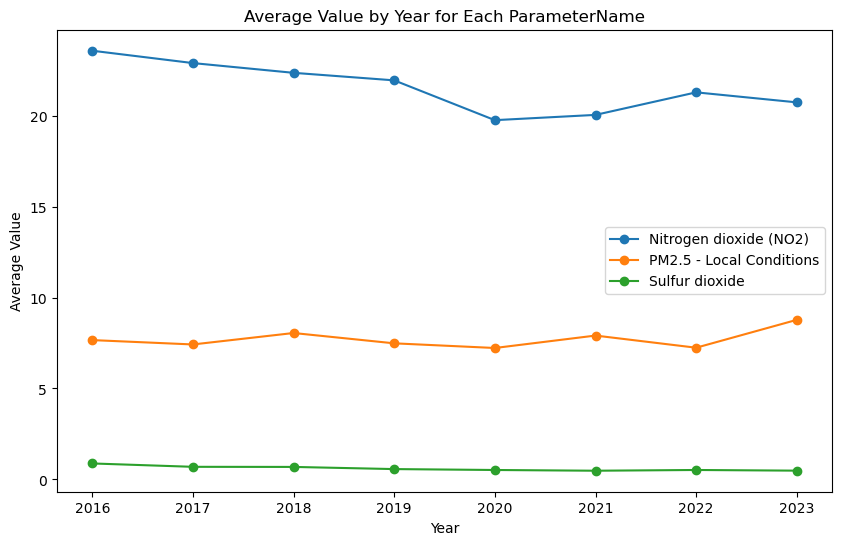

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 示例DataFrame的创建（你应该使用你自己的数据）
# df = pd.DataFrame({
#     'Year': [2016, 2017, 2016, 2017, 2016, 2017, 2016, 2017, 2016, 2017],
#     'ParameterName': ['Param1', 'Param1', 'Param2', 'Param2', 'Param3', 'Param3', 'Param1', 'Param1', 'Param2', 'Param2'],
#     'Value': [1, 2, 3, 4, 5, 6, 2, 3, 4, 5]
# })

# 首先，按ParameterName和Year分组，计算每组的Value平均值
grouped = air_data.groupby(['Parameter Name', 'Year'])['Arithmetic Mean'].mean().reset_index()

# 设置图表的大小
plt.figure(figsize=(10, 6))

# 对每个ParameterName进行循环
for name, group in grouped.groupby('Parameter Name'):
    # 对每个分组按Year排序，并绘制线图
    plt.plot(group['Year'], group['Arithmetic Mean'], marker='o', linestyle='-', label=name)

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Average Value by Year for Each ParameterName')
plt.xlabel('Year')
plt.ylabel('Average Value')

# 显示图表
plt.show()
